## <span style = "color:black">**Problem Setting**

실제 $N$명의 사람들로부터 키($x$)와 몸무게($t$)를 조사한 다음과 같은 data set $D$를 가지고 있다고 해보자.

$$ D = \{(x_1,t_1),(x_2,t_2,),\dots,(x_N,t_N)\}$$

키로 몸무게를 예측하는 모형을 만들고자 한다. 어떻게 만들 수 있을까?

## <span style = "color : black"> **Modeling** </span>

가장 단순한 접근은 **키($x$)를 입력**으로 하고 **몸무게($t$)를 출력**하는 **함수**$y(x|w)$를 만드는 것이다.

$$t = y(x|w)$$

- $w$는 함수의 parameter를 나타낸다.

파라미터$w$를 학습하여 키-몸무게 사이의 관계를 표현하는 거의 완벽하게 표현하는 함수를 얻었다고 해보자. 그렇다면 키$x$를 입력으로 하여 몸무게에 대한 예측값 $t$하나를 얻을 수 있다. 예를 들어 키가 175cm인 사람의 몸무게가 함수를 통하여 얻은 예측값이 72kg이라고 하자. 이 결과를 말로하면
"**키가 175cm인 사람의 몸무게는 72kg이야.**"라고 하는 것과 같다.

이렇게 키$x$에 대해서 몸무게에 대한 하나의 예측값$y$를 하나만 돌려주는 방법은 옳을까? 결론적으로 말하면 **그렇지 않다.** 왜냐하면 실제 data의 형태는 **키$x$에 대해 하나의 몸무게$t$만을 가지지 않기**이다. 예를 들자면 $(175,62),(175,72),(175,83),(175,88)\dots$등등 다양한 키-몸무게 다양한 조합이 가능하지만 **함수로 표현할 경우 하나의 입력은 하나의 출력에만 mapping**되며  **이 밖에 나올 수 있는 다른 값들에 대한 설명은 전혀 하지 않기 때문**이다. 그렇다면 어떠한 방법이 더 좋을까? **키가 175cm인 사람의 몸무게는 아마도 72kg 꺼야** 정도의 말을 할 수 있다면 가장 좋을 것이다. 

이러한 해석은 키가 175cm인 사람에 대해서 몸무게에 대한 예측이 거의 72kg이라고 확신하지만 이와 동시에 **몸무게의 예측값이 불확실**하며 **키가 동일하다 할지라도 어느정도는 랜덤하다는 것을 내포**한다.이렇게 불확실하며 랜덤한 가지는 값은 randomvariable라고 하며 문제에서 **몸무게$t$를 random-variable로 취급하면 위와 같은 해석이 가능**하다. 예를들어 키가 $x$인 사람의 몸무게$t$가 randomvariable이며 다음과 같은 정규분포를 따른다고 가정하자.

\begin{aligned}
&t\sim\mathcal{N}(y(x|w),\sigma^2) \\
&\longleftrightarrow p(t|x,w,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\text{exp}(\frac{-(t-y(x|w))^2}{2\sigma^2})
\end{aligned}

위와 같다면 $y(x|w)$에사 가장 높은 확률을 가지는 정규분포이므로 "키가 $x$인 사람의 몸무게$t$는 아마도 $y(x|w)$일꺼야"라는 것을 의미하며 또한 다른 값들에 대한 확률들도 어느정도 담고 있으므로 $t$가 불확실하며 랜덤하다는 것도 확실하게 표현함을 알 수 있다.

여기서 $\sigma^2$는 **우리가 한 예측에 대해서 얼마나 불확실인지를 나타내는 정도**이다. $\sigma^2$가 커서 확률분포의 변동이 크다면 모든 값에 대하여 일정한 확률을 부여하므로 예측값 $t$에 대한 확신이 없다는 것이고 변동이 작다면 어떤 특정 값에만 확률을 몰아서 부여한 것이므로 예측값$t$에 대한 확신이 크다는 것이다

예를 들어 $x = 175,\,y(x|w) = 72,\,t\sim\mathcal{N}(72,\sigma^2)$인 두 개의 정규분포를 따른다면 모양은 다음과 같다.

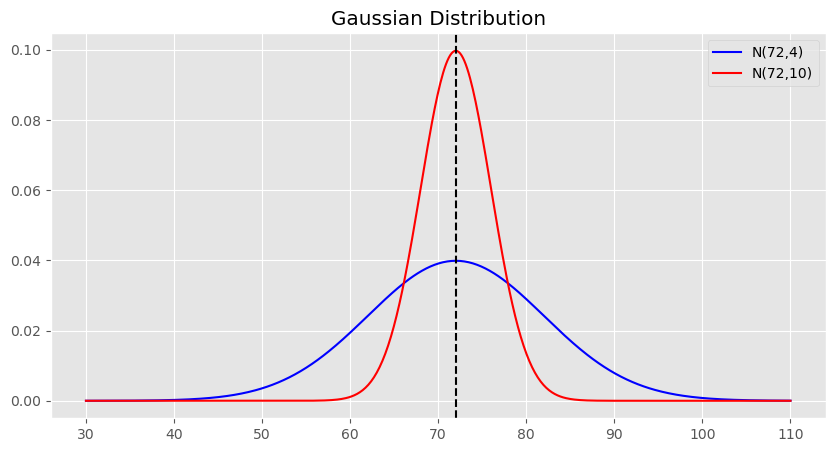

In [32]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

plt.figure(figsize=(10,5))
rv = sp.stats.norm(72,10)
rv2 = sp.stats.norm(72,4)
x = np.linspace(30,110,500)
plt.plot(x,rv.pdf(x),"b")
plt.plot(x,rv2.pdf(x),"r")
plt.axvline(72,linestyle="--",color="black")
plt.title("Gaussian Distribution")
plt.legend(["N(72,4)","N(72,10)"])

이와 같이 키$x=175$에 일때 몸무게$t$는 randomvariable이며 평균이72 확률이 가장 높으므로 **키가 175cm인 사람의 몸무게는 아마도 72kg 꺼야**라는 말을 할 수 있으며 또한 다른 값으로 나올 확률도 빠짐없이 표현되어 있으므로 이와 같은 몸무게$t$는 확률변수로 표현하는 적절하다. 또한 빨간색 그래프는 파란색그래프보다 $\sigma^2$가 더 크며 $t=72$에서 더 높은 확률을 부여하므로 예측에 대한 확신이 더 크다는 것을 나타낸다.

지금까지 몸무게 $t$를 randomvariable이며 확률분포 $\mathcal{N}(y(x|w),\sigma^2)$를 따른다고 하였다. 예시에서는 확률분포를 parameter를 가정하고 그래프를 그려서 비교했지만 실제로는 **확률분포의 종류도 모르거니와 확률분포의 parameter도 모르기에 위와 같은 해석을 할 수 없다.** 그러므로 여기서부터는 확률분포를 추정하는 것에 관한 얘기를 해보고자 한다.

## <span style = "color : black">**MLE(최대가능도 추정법)**

주어진 데이터에 맞는 확률분포는 어떻게 결정할 수 있을까? 크게 두 단계로 나뉜다.
- 확률분포의 종류 결정
- 확률분포의 파라미터 추정

확률분포의 종류를 결정하는 일은 문제마다 다르다. 위에서 예시로 들었던 몸무게와 같은 연속적인 확률변수일 경우 연속확률분포 중 하나를 가정하고 이산확률변수일 경우 이산확률분포 중 하나를 가정한다. 위의 문제에서는 정규분포를 몸무게$t$의 분포로 가정했다. 그러나 이는 문제에 따라 다르며 문제에 맞는 적절한 확률분포를 먼저 가정해야 한다.

확률분포를 가정했다면 다음은 확률분포의 parameter를 구하면 된다.(추정한다고 말한다.)parameter를 추정할 경우 우리는 확률분포에 대한 완전한 식을 얻을 수 있으며 따라서 확률분포로부터 여러가지 정보를 얻을 수 있다. 여기서는 MLE를 통해서 확률분포의 파라미터를 추정한다.

앞선 문제를 풀기전에 앞서서 간단한 예시로 예를 MLE에 대한 감을 잡아보자.예를 들어 대한민국 20대 남성들 중 한명의 키를 골라서 얻은 data set $D = \{65\}$가 주어졌다고 가정 해보자. 분포의 모양은 먼저 정규분포로 가정한다. 

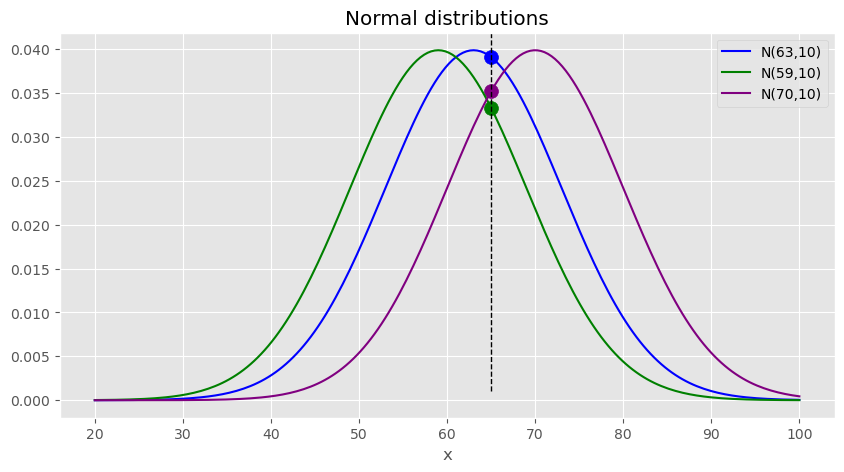

In [53]:
rv1 = sp.stats.norm(63,10)
rv2 = sp.stats.norm(59,10)
rv3 = sp.stats.norm(70,10)
x = np.linspace(20,100,200)
plt.figure(figsize=(10,5))
plt.plot(x,rv1.pdf(x),"b")
plt.plot(x,rv2.pdf(x),"g")
plt.plot(x,rv3.pdf(x),"purple")
#plt.plot([177],[0],"o",color="black",ms="10")
plt.axvline(65,color = "black",linewidth = 1,linestyle = "--",ymin=0.07)
plt.title("Normal distributions")
plt.xlabel("x")
plt.scatter([65],[rv1.pdf(65)],color="b",s=100)
plt.scatter([65],[rv2.pdf(65)],color="g",s=100)
plt.scatter([65],[rv3.pdf(65)],color="purple",s=100)
plt.legend(["N(63,10)","N(59,10)","N(70,10)"])

평균만 다른 정규분포 3개를 고려해보자. 이 중 어떤 분포에서 $D$가 나왔을까? 주어진 3개의 분포중에는 $\mu=63$인 파랑색에 해당하는 분포에서 $D=\{65\}$를 나왔을 가능성이 가장 크다. **왜냐하면 파랑색 확률분포에서 dataset에 속한 하나의 datapoint가 나올 확률이 가장 크기때문**이다. 그러므로 3개의 정규분포중에서는 $\mu =63$인 경우가 $D$에 가장 적합하다고 할 수 있으며 그 다음은 보라색 그 다음은 초록색 분포의 모수가 적합하다.<br>

이번에는 2개의 관측치가 존재하는 data set $D = \{62,65\}$가 주어졌다고 가정 해보자.

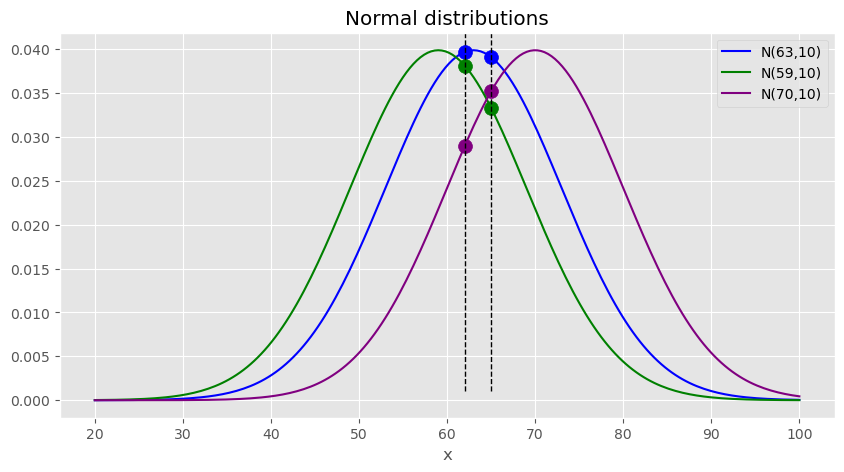

In [94]:
rv1 = sp.stats.norm(63,10)
rv2 = sp.stats.norm(59,10)
rv3 = sp.stats.norm(70,10)
x = np.linspace(20,100,200)
plt.figure(figsize=(10,5))
plt.plot(x,rv1.pdf(x),"b")
plt.plot(x,rv2.pdf(x),"g")
plt.plot(x,rv3.pdf(x),"purple")
#plt.plot([177],[0],"o",color="black",ms="10")
plt.axvline(65,color = "black",linewidth = 1,linestyle = "--",ymin=0.07)
plt.axvline(62,color = "black",linewidth = 1,linestyle = "--",ymin=0.07)
plt.title("Normal distributions")
plt.xlabel("x")
plt.scatter([65],[rv1.pdf(65)],color="b",s=100)
plt.scatter([65],[rv2.pdf(65)],color="g",s=100)
plt.scatter([65],[rv3.pdf(65)],color="purple",s=100)
plt.scatter([62],[rv1.pdf(62)],color="b",s=100)
plt.scatter([62],[rv2.pdf(62)],color="g",s=100)
plt.scatter([62],[rv3.pdf(62)],color="purple",s=100)
plt.legend(["N(63,10)","N(59,10)","N(70,10)"])

어떤 확률분포에서 $D=\{62,65\}$가 나왔을까? 마찬가지로 파랑색 분포가 주어진 분포중에서는 가장 가능성이 커보이는데 왜냐하면 마찬가지로 **dataset에 속한 2개의 각각의 datapoint를 얻을 확률이 가장 커보이기 때문**이다. 그러므로 위와 동일하게 3개의 정규분포중에서는 $\mu =63$인 경우가 $D$에 가장 적합하다고 할 수 있으며 이번에는 초록색,보라색 순서로 모수가 적합하다.<br>

이번에는 크기가 $N$인 $D$가 주어져있다고 가정해보자.

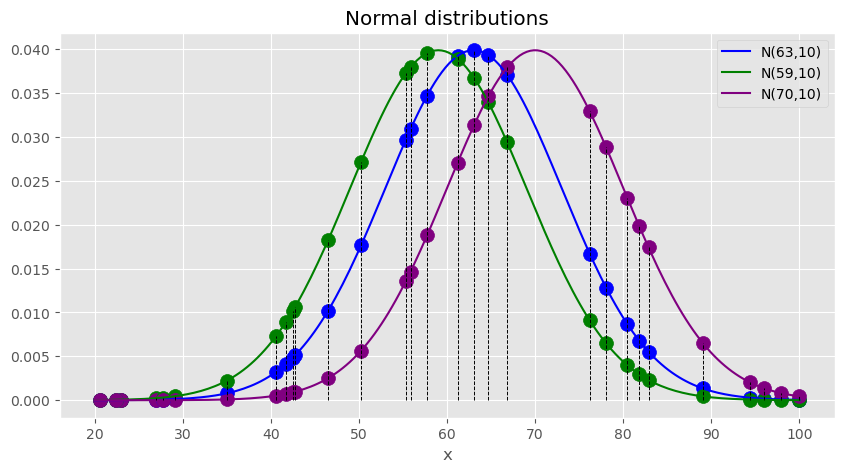

In [95]:
import random
rv1 = sp.stats.norm(63,10)
rv2 = sp.stats.norm(59,10)
rv3 = sp.stats.norm(70,10)
x = np.linspace(20,100,200)
plt.figure(figsize=(10,5))
plt.plot(x,rv1.pdf(x),"b")
plt.plot(x,rv2.pdf(x),"g")
plt.plot(x,rv3.pdf(x),"purple")
_nums = np.linspace(20,100,300).tolist()
_nums
idx=0
while idx<30:
    d = random.sample(_nums,k=1)
    _t = [rv1.pdf(d[0]),rv2.pdf(d[0]),rv3.pdf(d[0])]
    _maxy = max(_t)
    #plt.axvline(d[0],color = "black",linewidth = 1,linestyle = "--",ymin=0.07,ymax = _maxy,)
    plt.vlines(d[0], 0, _maxy, color='black', linestyle='--', linewidth=0.7)
    plt.title("Normal distributions")
    plt.xlabel("x")
    plt.scatter(d,[rv1.pdf(d[0])],color="b",s=100)
    plt.scatter(d,[rv2.pdf(d[0])],color="g",s=100)
    plt.scatter(d,[rv3.pdf(d[0])],color="purple",s=100)
    plt.legend(["N(63,10)","N(59,10)","N(70,10)"])    
    idx+=1

- 그래프는 크기가 30인data set이지만 N이라고 보자..!

이번에도 어떤 확률분포에서 $D$가 나왔을지 한번 구분해보자. 그러나 이전에는 $D$의 크기가 1또는 2여서 직관적으로 보였지만 이번에는 데이터가 너무 많기 때문에 바로 보이지 않는다.

그러나 이전에 했던 과정들 중에서 $D$에 있는 **각각의 datapoint를 취할 확률을 모두 고려한뒤에 그 값이 가장 큰 parameter를 주어진 $D$에 가장 적합한 parameter** 로 결정했었는데 이 사실은 그대로 사용할 수 있다. 왜냐하면 사실 각각의 **datapoint를 모두 취할 확률은 결합확률이기 때문**이다. 또한 각각의 datapoint는 모두 독립적이며 동일한 분포로부터 뽑힌 값이기 때문에 **결합확률은 각 datapoin를 모두 동시에 취할 확률**이다. 

\begin{align}
p(D|\theta) &= p_{X_1,X_2,\dots,X_N}(x_1,x_2,\dots,x_N;\theta) \\
&= p_{X_1}(x_1|\theta)\cdot p_{X_2}(x_2|\theta)\dots  \cdot p_{X_N}(x_N|\theta) \\
&= \prod_{i=1}^{N}p_{X_i}(x_i;\theta)
\end{align}

- $\theta$는 parameter를 의미한다. 정규분포의 parameter이므로 $\mu,\sigma^2$라 생각하면 된다.
- 결합확률은 likelyhood라고도 한다.

그러므로 3개의 서로다른 $\theta$에 대한 확률분포에 대하여 모두 likelyhood를 구한뒤 그 중 가장 큰 값을 parameter로 하면 된다. 그런데 사실 우리의 비교 대상은 단 3개의 $\theta$가 아니다. **가능한 모든 확률분포 즉 가능한 모든 $\theta$에 대하여 likelyhood의 가장 큰 값을 구해야** 한다. 그러므로 **$\theta$를 변수로 생각하여 likelyhood를 가장크게 하는 $\theta$를 찾는다.** 따라서 maximum likelyhood estimation이며 이를 통하여 나온 parameter $\theta$에 대한 추정량은 다음과 같다.

\begin{aligned}
\hat{\theta}_{MLE} &= \underset{\theta}{\text{argmax}}\,p_{X_1,X_2,\dots,X_n}(x_1,x_2 \dots x_n|\theta) \\
&=  \underset{\theta}{\text{argmax}}\,p_{X_1,X_2,\dots,X_n}(x_1,x_2,\dots,x_n|\theta) \\
&= \underset{\theta}{\text{argmax}}\,\prod_{i=1}^{N}p_{X_i}(x_i;\theta)
\end{aligned}

정리하자면 결국 MLE는 파라미터를 추정하는 방법으로 likelyhood($D$에 있는 각각의 datapoint가 모두 나올 확률)를 최대화하는 파라미터$\theta$를 추정량으로 한다는 것이다.

이제 기존문제로 돌아가보자. 우리에게 주어진 data set $D$는 다음과 같았으며 정규분포로 몸무게는 $t$로 가정했었다.

\begin{aligned}
&D = \{(x_1,t_1),(x_2,t_2,),\dots,(x_N,t_N)\} \\
&t\sim\mathcal{N}(y(x|w),\sigma^2) \\
&\longleftrightarrow p(t|x,w,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\text{exp}(\frac{-(t-y(x|w))^2}{2\sigma^2})
\end{aligned}

$D$에 있는 각각의 datapoint를 모두 나올 확률은 키가 $x_1$일 때 실제 몸무게가 $t_1$이고, 키가 $x_2$일 때 실제 몸무게가 $t_2$이고, $x_N$일 때 실제 몸무게가 $t_N$일 확률과 같다. 따라서 likelyhood는 다음과 같다.

\begin{aligned}
p(D|\theta) &= p(t_1,t_2,\dots,t_N|X,w,\sigma^2) \\
&= \prod_{n=1}^Np(t_i|x_i,w,\sigma^2) \\
&= \prod_{n=1}^N\frac{1}{\sqrt{2\pi\sigma^2}}\text{exp}(\frac{-(t_i-y(x_i|w))^2}{2\sigma^2})
\end{aligned}

결국 찾으려는 parameter $w$는 다음과 같다.

\begin{aligned}
\hat{w}_{MLE} = \underset{w}{\text{argmax}}&\prod_{n=1}^N\frac{1}{\sqrt{2\pi\sigma^2}}\text{exp}(\frac{-(t_i-y(x_i|w))^2}{2\sigma^2})
\end{aligned}

위의 식으로부터 직접 최대화 하는 $w$를 찾기는 어려우므로 likelyhood에 $-\text{ln}$를 곱해준 NLL을 사용한다. $\text{ln}$함수는 곱해도 최댓값(또는 최솟값)의 위치가 변하지 않으며 곱셈연산을 덧셈연산으로 바꿔 계산을 간단하게 해준다. 또한 -를 곱해줌으로서 최소지점을 찾는 문제로 바뀌게 된다. 

\begin{aligned}
\hat{w}_{MLE} &= \underset{w}{\text{argmin}}-\text{ln}\prod_{n=1}^N\frac{1}{\sqrt{2\pi\sigma^2}}\text{exp}(\frac{-(t_i-y(x_i|w))^2}{2\sigma^2})\\
&= \underset{w}{\text{argmin}}-\sum_{n=1}^N\text{ln}\frac{1}{\sqrt{2\pi\sigma^2}}\text{exp}(\frac{-(t_i-y(x_i|w))^2}{2\sigma^2}) \\
&= \underset{w}{\text{argmin}}-\sum_{n=1}^{N}\bigg[\text{ln}\frac{1}{\sqrt{2\pi\sigma^2}} + \text{ln}\,\text{exp}(\frac{-(t_i-y(x_i|w))^2}
{2\sigma^2})\bigg]\\
&= \underset{w}{\text{argmin}}-\sum_{n=1}^{N}\bigg[\text{ln}\frac{1}{\sqrt{2\pi\sigma^2}} - \frac{(t_i-y(x_i|w))^2}{2\sigma^2}\bigg]
\end{aligned}

여기서 $w$의 관점에서 상수($\pi,\sigma^2$)를 제거하고 보면 다음과 같다.

\begin{aligned}
\hat{w}_{MLE} = \underset{w}{\text{argmin}}\sum_{n=1}^{N}(t_i-y(x_i|w))^2
\end{aligned}

어디선가 많이 본 식이다. 바로 MSE Loss이다. 이렇게 정규분포로 데이터를 가정하고 MLE를 사용하면 MSE Loss를 유도할 수 있다. 이것이 바로 일반적으로 회귀문제에서 MSE Loss를 사용하는 이유이다. 이진분류문제의 경우 베르누이분포를 가정하고 하면 Binary cross entropy Loss를 유도할 수 있다.

## <span style = "color : black">**베이즈 정리에서 바라본 MLE**

$D=(t_1,t_2,\dots,t_n)$는 샘플(데이터셋), $\theta$는 우리가 알고싶은 확률분포의 모수라고 합시다. 베이즈정리는 증거 또는 조건이 주어지기 전의 사전확률 $p(D)$와 주어진 후의 사후확률 $p(\theta|D)$사이의 관계를 알려줍니다.

\begin{aligned}
p(\theta|D) = \frac{p(D|\theta)p(\theta)}{p(D)} \propto p(\theta|D) \times p(\theta)
\end{aligned}

여기서 사후확률은 $\theta$에 대한 확률분포로 데이터(샘플)이 주어질때 확률분포의 임의의 모수$\theta$가 얼마나 가능한지 또는 불확실한지 그 정도를 알려주는 확률을 함숫값으로 가지는 확률함수입니다. 그러므로 사후확률을 최대로 하는 모수$\theta$가 데이터셋이 주어져있을 때 가장 확률이 높은,가능성이 높은 모수이므로 그때의 값을 확률분포의 모수로 추정하면 됩니다.

문제는 왼쪽의 확률분포는 바로 알기가 쉽지 않다는 점입니다. 따라서 베이즈정리를 통하여 우변의 식을 최대화 하는 값을 구합니다. 우변의 식에서 분모는 주어진 데이터에 의하여 고정된 상수(normalization constant라고 합니다)입니다. 그러므로 최댓값을 구하는데 영향을 주지 않습니다. 우리는 분자에 있는 $p(D|\theta)p(\theta)$를 최대화하는 $\theta$를 찾으면 됩니다.

여기서 $p(D|\theta)$를 가능도(likelyhood)라 합니다. MLE에서는 분자에서 가능도만 최대로 하는 $\theta$를 구합니다. MAP라는 다른 방법은 분자에 있는  $p(D|\theta)p(\theta)$를 최대화 하는 $\theta$를 구한다고 합니다.

가능도함수를 최대로 하는 모숫값은 175.75입니다. 따라서 MLE에 의한 모수에 대한 추정값은 175.75입니다.<br>
$$\hat{\theta}_{MLE} = 175.75$$

[링크1(random sample vs random variable)](https://stats.stackexchange.com/questions/239500/what-is-the-difference-between-random-variable-and-random-sample)<br>
[링크2(추정,추정량,추정값)](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=soohwan2-&logNo=100200023641)<br>
[링크3(mle)](https://angeloyeo.github.io/2020/07/17/MLE.html)<br>
[링크4(mle)](https://datascienceschool.net/02%20mathematics/09.02%20%EC%B5%9C%EB%8C%80%EA%B0%80%EB%8A%A5%EB%8F%84%20%EC%B6%94%EC%A0%95%EB%B2%95.html)